# Estimation and Sampling Pair Sprint Solutions
### Read and understand the code in afternoon_soln.py to follow the narrative of the solutions presented in this notebook.

In [5]:
%run pair_soln.py
%matplotlib inline

## Part 0: Central Limit Theorem
- Generate data drawn from various distributions.

In [6]:
# Binomial(n, p)
binom_rvs = make_draws(stats.binom, {'n': 100, 'p': 0.1})

# Uniform(a, b), here: a = loc, b = loc+scale
unif_rvs = make_draws(stats.uniform, {'loc': 10, 'scale': 20}) 

# Poisson(lambda), here: lambda = mu
poisson_rvs = make_draws(stats.poisson, {'mu': 2}) 

# Exponential(lambda), here: lambda = 1 / scale
expon_rvs = make_draws(stats.expon, {'scale': 2})

# Geometric(p)
geom_rvs = make_draws(stats.geom, {'p': 0.1})

It's a good idea to inspect these arrays to make sure things look as expected.  Once you are satified that the data makes sense you can go on to building the plotting function.

Once you have `plot_means` working be sure to play around with various inputs to see how closely the sampling distribution of the sample mean resembles a Normal distribution.

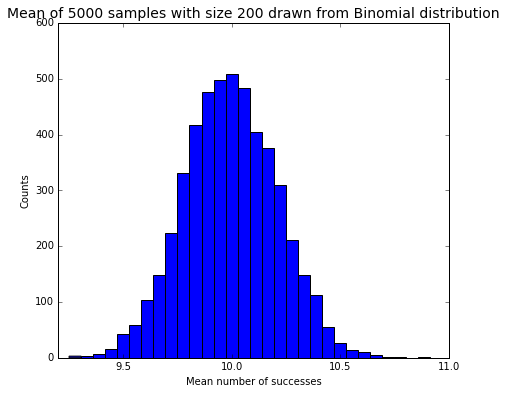

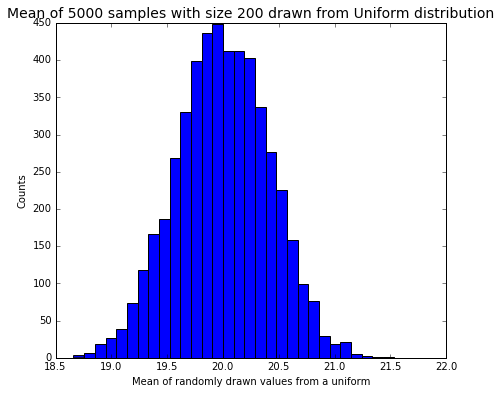

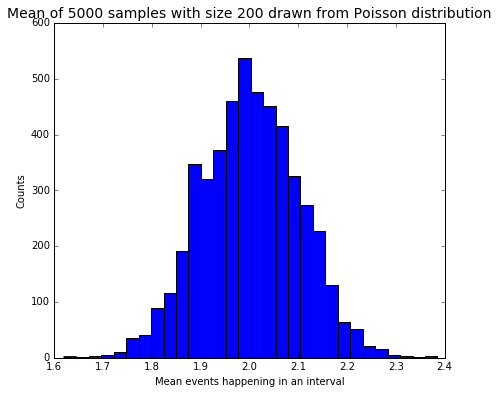

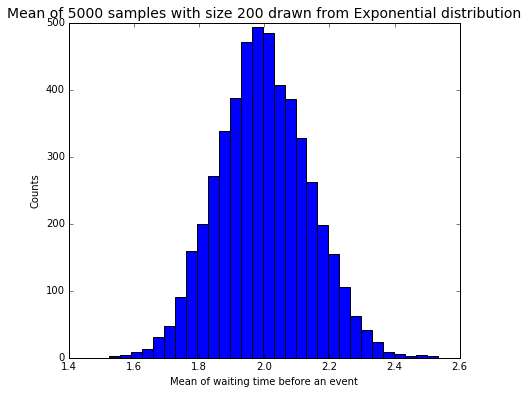

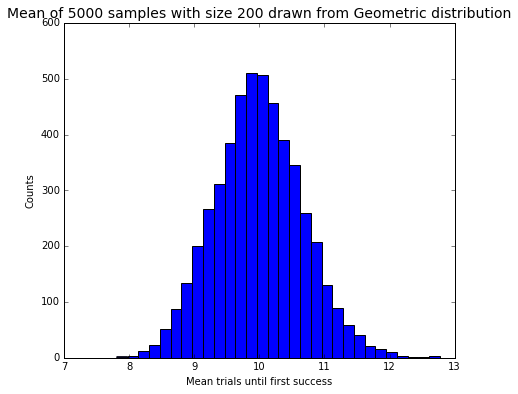

In [7]:
plot_bootstrapped_statistics(stats.binom, {'n': 100, 'p': 0.1})
plot_bootstrapped_statistics(stats.uniform, {'loc': 10, 'scale': 20}) 
plot_bootstrapped_statistics(stats.poisson, {'mu': 2}) 
plot_bootstrapped_statistics(stats.expon, {'scale': 2})
plot_bootstrapped_statistics(stats.geom, {'p': 0.1})

- What do you observe if you change the sample size to 10 instead of 200, keeping repeats constant at 5000? Explain your observation on a high level. Does the CLT apply when your sample size is small even given a large number of repeat?

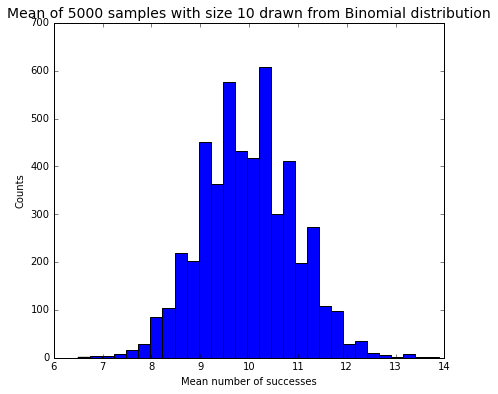

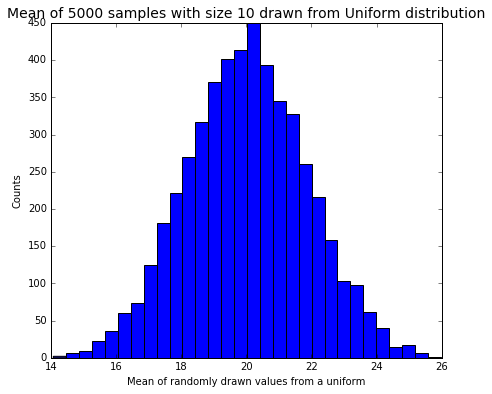

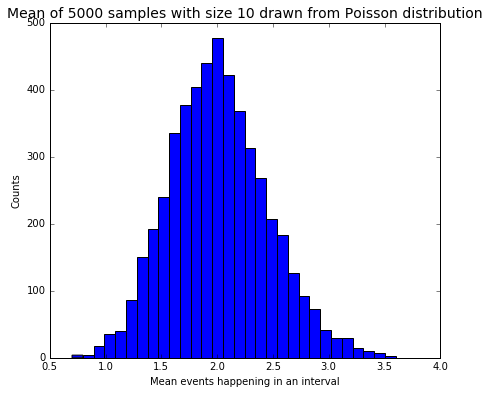

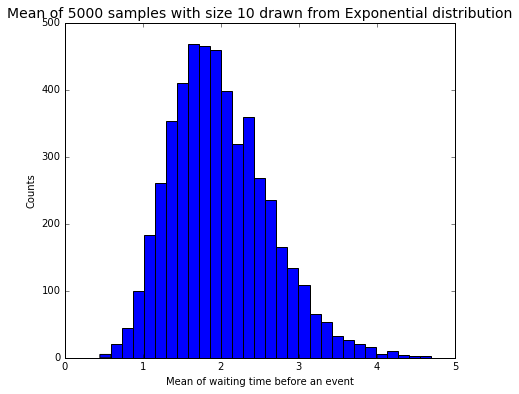

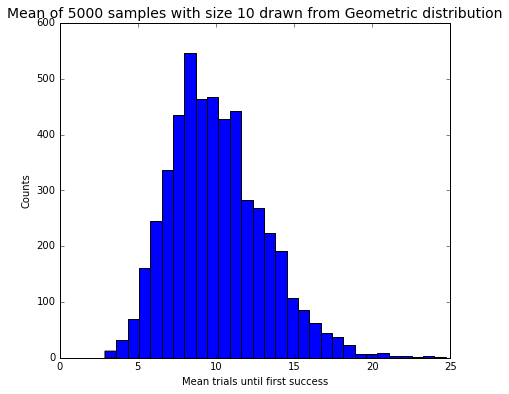

In [8]:
plot_bootstrapped_statistics(stats.binom, {'n': 100, 'p': 0.1}, size=10, repeats=5000)
plot_bootstrapped_statistics(stats.uniform, {'loc': 10, 'scale': 20}, size=10, repeats=5000) 
plot_bootstrapped_statistics(stats.poisson, {'mu': 2}, size=10, repeats=5000) 
plot_bootstrapped_statistics(stats.expon, {'scale': 2}, size=10, repeats=5000)
plot_bootstrapped_statistics(stats.geom, {'p': 0.1}, size=10, repeats=5000)

`With a sample size of 10, we see some significant deviations from normality. The mean of samples drawn from a distribution only converge to a normal distribution when the sample is large enough (>30 for reasonably symmetric and unimodal distributions).`

- Instead of taking the mean of the samples, take the maximum of each of the samples and plot the histograms again. Do they resemble the normal distribution? Do all sample statistics follow a normal distribution?



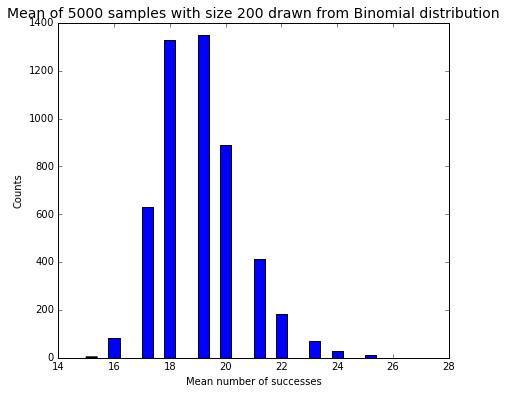

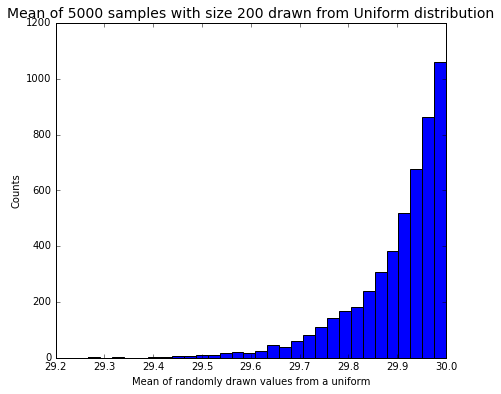

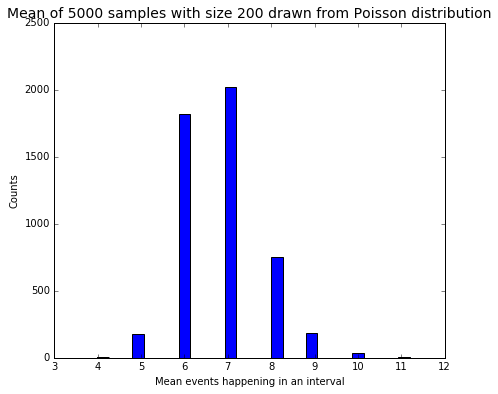

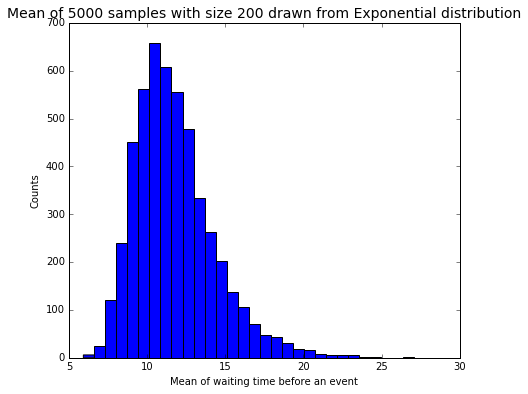

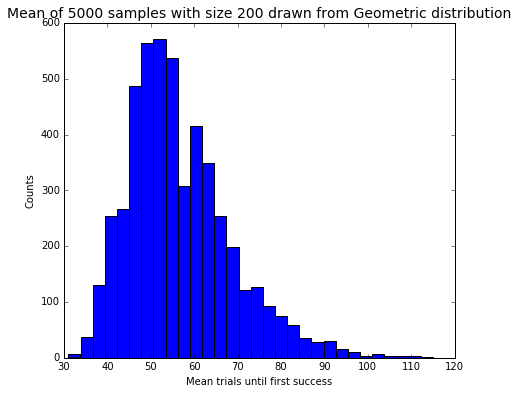

In [9]:
plot_bootstrapped_statistics(stats.binom, {'n': 100, 'p': 0.1}, func=np.max)
plot_bootstrapped_statistics(stats.uniform, {'loc': 10, 'scale': 20}, func=np.max) 
plot_bootstrapped_statistics(stats.poisson, {'mu': 2}, func=np.max) 
plot_bootstrapped_statistics(stats.expon, {'scale': 2}, func=np.max)
plot_bootstrapped_statistics(stats.geom, {'p': 0.1}, func=np.max)

`The maximum of a sample from a distribution definitely does NOT follow the *Central* Limit Theorem (most of these histograms are very left skewed). The CLT only applies to sample means (technically for any sum), and not explicitly for any other statistic.` 

## Part 1: Population Inference and Confidence Interval
- Load, compute mean of Google's lunch-hour survey:

In [10]:
## Change path to lunch_hour.txt here:
lunch = np.loadtxt('data/lunch_hour.txt')

print "Lunch hour sample mean: ", lunch.mean()

Lunch hour sample mean:  2.1845


- What is the sampling distribution of the sample mean?

`According to the CLT, any sample mean of a sufficiently large sample has a sampling distribution that approximates to the Normal distribution.`

- Calculate the Standard Error and its 95% Confidence Interval:    

In [11]:
se = standard_error(lunch)
m = lunch.mean() 
print 'Lower 95% CI:',  m + 1.96 * se 
print 'Upper 95% CI:', m - 1.96 * se


Lower 95% CI: 2.26471462215
Upper 95% CI: 2.10428537785


- Interpret what the 95% confidence interval implies about the lunch hours of Google employees in general.

`If we hypothetically ran this survey of employee lunches 100 times and computed the 95% CI each time we would expect that 95 of those 100 CI would contain the true population mean. Note that the chance here is about the sampling and interval construction procedure -- not the parameter.  There is no randomness or variation associated with the parameter in the confidence interval framework.  Saying there is a 95% chance the parameter is in the interval suggests that sometimes it will be in the interval and sometimes it won't.  But this is NOT the case.  Either it *is* or it *is not* in the interval.  We don't know.  But we do know it's a 95% confidence interval so hypothetically 95% of the time these intervals capture the true population mean. Therefore, 95% confidence intervals give us a reasonable range for our uncertainty about what we think the parameter might be. Here it seems google employees likely have a two hour and ten minute lunch break, give or take about five minutes.`

`Confidence intervals are part of the same frequentist framework as hypothesis testing. The fact that 0 is not included in the 95% confidence interval means that we would reject the null hypothesis that google employees do not take a lunch break at the 1-0.95 alpha signficance level.  If we did not start out with a null hypothesis of "no lunch break" for google employees but instead wanted to test if they take on average two hours for their lunch break we could have done that as well.  But we would have had to start out with that assumption -- we can't change our null hypothesis after the fact to reflect (and subsequently "test") something we've see in the data.  Confidence intervals are nice because they do not require a null hypothesis.  They simply give us a plausible range for the population parameter under examination.`

`Further Hypothesis Testing Comments and Relationships to Confidence Intervals Therein:`

`Note that p-values are not the probability that the null hypothesis is true. Null hypotheses are either true or not true just as the parameter value is either in or not in a confidence interval.  Also note that p-values are not the probability of wrongly rejecting the null hypothesis.  That is the alpha significance level and, e.g., using a 1.96 multiplier for the standard error in our above confidence interval specifies a 1-0.05 or 95% confidence interval (which explains the 95% confidence intervals relationship to a 0.05 alpha significance level test).  Finally, note that the p-value is a measure of evidence against the null hypothesis (formalized as the probability of as or more extreme than what we saw in the data if indeed the null hypothsis was true).  The confidence interval approach instead ops to give a plausible uncertainty range (interval) with specific statistical evidence guarantees and interpretations.` 

- If the sample size were smaller, how would that affect the 95% CI? Explain your answer.

`If the sample size is smaller, the CI will be wider since the sample standard deviation is larger and hence the standard error is larger and therefore mean +/- 1.96 * SE is of a larger range. If the sample size is 10, we likely cannot leverage the interval computation as the sampling distribution of the mean might not yet well approximate a normal distribution.` 

(Note: We will introduce a new t-test method for calculating CIs that addresses the situation of small sample sizes tomorrow with Frequentist Hypothesis Testing. But seriously, get a larger sample than 10 observations.)


## Part 2: Bootstrapping
- Why, given a smaller sample size, are we able to use bootstrapping to compute a more precise 95% CI as compared to the approach we used in Part 1

`Bootstrapping is an empirical approach that does not make any assumptions about the underlying distribution that it is sampling (i.e. we aren't assuming that the sampling distribution of the sample mean is approximately Normal).  Even with small sample sizes (e.g., fewer than around 30 examples) where the CLT approaximation is not yet reasonable  the bootstrapped confidence interval can be relatively precise.`

In [12]:
# Create some random data to test our bootstrap func.
rand_data = np.random.randn(5)

booted_data = bootstrap(rand_data, iterations = 3)

# Check that bootstrap is working as expected. booted_data is a list of arrays.
print rand_data
print booted_data

[ 0.9777451   0.61166384 -3.23197353  1.16327888 -1.23871027]
[array([[ 0.9777451 ],
       [-3.23197353],
       [ 0.61166384],
       [ 1.16327888],
       [-3.23197353]]), array([[-3.23197353],
       [ 1.16327888],
       [ 0.61166384],
       [-1.23871027],
       [ 0.9777451 ]]), array([[ 0.9777451 ],
       [ 0.61166384],
       [-1.23871027],
       [ 0.61166384],
       [ 0.9777451 ]])]


## Part 3: Bootstrap to find Confidence Interval of Mean

- Why is it inappropriate to only report the mean difference in productivity as evidence to support the decision of changing all the monitors to Apple monitors in the company?

`The mean difference in productivity is a point estimate from a sample of a larger population.  This type of point estimate does not really tell us anything unless we have some measure of how certain it is, and usually we use a confidence interval for that.`

In [13]:
#Change path to productivity.txt:
productivity = np.loadtxt('data/productivity.txt')
se_prod = standard_error(productivity)
m_prod = productivity.mean() 

print 'Mean difference in productivity:', m_prod
print 'Lower 95% CI:',  m_prod + 1.96 * se_prod
print 'Upper 95% CI:', m_prod - 1.96 * se_prod

Mean difference in productivity: 5.044
Lower 95% CI: 10.4182027704
Upper 95% CI: -0.330202770421


- Why might the confidence interval computed in the previous question be unreliable? 

`A sample of 25 is perhaps too small for us to reliably apply the CLT. Hence, we are not sure the sampling distribution will be normal. The CI is imprecise if the sampling distribution is not normal.`

(Remember, the sampling distribution of the sample mean will be normal as the sample size *approaches infinity*. Fortunately, in practice the deviation from normality becomes small even with relatively small sample sizes. For reasonably symmetric and unimodal distributions a sample size of 30 is likely large enough for the CLT to sufficiently kick in.  Thus in many settings the sampling distribution of the sample mean can be treated as approximately normal.)


In [14]:
lower_ci, upper_ci, bootstrap_means_prod = bootstrap_confidence_interval(productivity, ci=95)
print "The 95% bootstrapped CI of the mean:", lower_ci, upper_ci
print "Your results would be slightly different" 

The 95% bootstrapped CI of the mean: -0.46024 10.50432
Your results would be slightly different


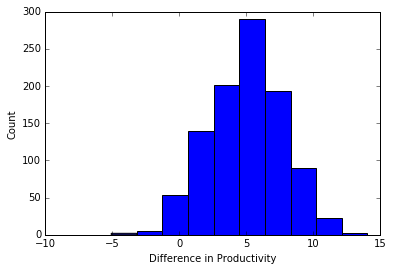

In [15]:
plt.hist(bootstrap_means_prod)
plt.ylabel('Count')
plt.xlabel('Difference in Productivity')

- Based on the bootstrap confidence interval, what conclusions can you draw? What about if a 90% confidence interval were used instead?

`Based on the 95% bootstrap CI, we are unable to conclude that the new monitors would lead to an productivity improvement in the population since the CI includes zero in the differences in productivity, implying possibility of no improvement or even reduction in performance.`

- What about if a 90% confidence interval were used instead?

In [17]:
lower_ci, upper_ci, bootstrap_samples_stat = bootstrap_confidence_interval(productivity, ci=90)
print "The 90% bootstrapped CI of the mean:", lower_ci, upper_ci
print "Your results would be slightly different"

The 90% bootstrapped CI of the mean: 0.4476 9.3174
Your results would be slightly different


`Here we see that the CI does not include 0, so we could conclude that there is statistical evidence that the monitors lead to an improvement.  However, we are allowing for a larger chance of a Type I Error (To be discussed in more detail with Frequentist Hypothesis Testing).`


- Suppose there are 100 programmers in the company. The cost of changing a monitor is \$500 and the increase of one unit of productivity is worth \$2,000, would you recommend switching the monitors? State the assumptions you are making and show your work.

`If you want 95% confidence in your decision the answer is obviously a no go since there is a potential decrease in production.  However, if we use the 90% CI to establish a minimum expected average improvement of 0.6 units (which should be close to the value printed above) this implies a net improvement of 0.60 units/person * 100 people = 60 units which has a value of $2000*60 = $120,000 while the cost of new monitors would be $500*100 = $50,000 leading to a profit of approx $70,000 ==> they should buy the new monitors.`

## Part 4: Bootstrap to find Confidence Interval of Correlation
Correlation between LSAT scores and law school grade point average.

In [18]:
## Change path to law_sample.txt
law_sample = np.loadtxt('data/law_sample.txt')

# In order to be able to use our bootstrap_ci function for correlations, 
# we wrote a wrapper around the Numpy Pearson correlation method.
# We also use this wrapper here to compute the sample correlation.
corr_coeff, p_val = pearson_correlation(law_sample)
print "Correlation Coeff/P-value of corr between LSAT and GPA:", corr_coeff, p_val

Correlation Coeff/P-value of corr between LSAT and GPA: 0.776374491289 0.000665102011103


- Bootstrapped Estimate of the Correlation

In [22]:
lower_ci, upper_ci, bootstrap_corr_law = \
   bootstrap_confidence_interval(law_sample, stat_function=lambda x: pearson_correlation(x)[0],
                iterations=10000, ci=95)
print "Bootstrapped 95% CI of Law school correlation coeff:", lower_ci, upper_ci
print "Bootstrapped 95% CI does not contain 0, so LSAT seems predictive of GPA"

Bootstrapped 95% CI of Law school correlation coeff: 0.444771422534 0.963674710996
Bootstrapped 95% CI does not contain 0, so LSAT seems predictive of GPA


In [23]:
bootstrap_corr_law[0

0.88273532528868159

In [19]:
plt.hist(bootstrap_corr_law)
plt.xlabel('Correlation Coeff.')
plt.ylabel('Count')

KeyboardInterrupt: 

Error in callback <function post_execute at 0x10bb53d70> (for post_execute):


ValueError: object too deep for desired array

KeyboardInterrupt: 

Recall from the sprint that the shape of this distribution should make us suspicious, due to its asymmetry, and we might want to look into: [Studentized Bootstrap & Bias-Corrected Bootstrap](http://en.wikipedia.org/wiki/Bootstrapping_%28statistics%29#Methods_for_bootstrap_confidence_intervals)

- Load in the population data and verify the population correlation is in the 95% CI


In [31]:
law_all = np.loadtxt('data/law_all.txt')
corr_coeff, p_val = pearson_correlation(law_all)
print "Population-wide LSAT and GPA correlation and P-value:", corr_coeff, p_val

Population-wide LSAT and GPA correlation and P-value: 0.759997855504 1.24029033101e-16
